<a href="https://colab.research.google.com/github/georgeragan/FACE-MASK-DETECTION/blob/main/FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:05<00:00, 36.1MB/s]
100% 163M/163M [00:05<00:00, 31.5MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
#importing dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2569.jpg', 'with_mask_3017.jpg', 'with_mask_2648.jpg', 'with_mask_2819.jpg', 'with_mask_82.jpg']
['with_mask_222.jpg', 'with_mask_2629.jpg', 'with_mask_180.jpg', 'with_mask_3321.jpg', 'with_mask_3254.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2199.jpg', 'without_mask_2319.jpg', 'without_mask_2503.jpg', 'without_mask_698.jpg', 'without_mask_3711.jpg']
['without_mask_2151.jpg', 'without_mask_2457.jpg', 'without_mask_211.jpg', 'without_mask_5.jpg', 'without_mask_544.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
#Creating Labels for the two class of Images
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


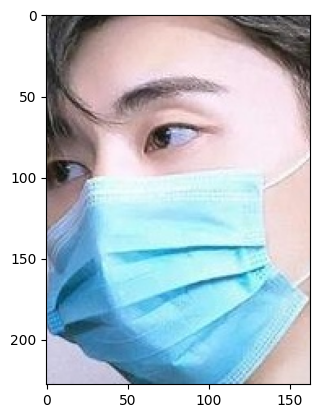

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

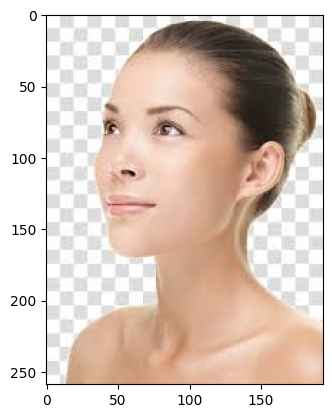

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()


In [16]:
#Resize the Images & Convert the images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
len(data)

7553

array([[[42, 31, 29],
        [39, 28, 26],
        [37, 25, 25],
        ...,
        [15, 14, 19],
        [15, 14, 19],
        [15, 14, 19]],

       [[42, 31, 29],
        [37, 26, 24],
        [34, 22, 22],
        ...,
        [15, 14, 19],
        [15, 14, 19],
        [15, 14, 19]],

       [[37, 26, 24],
        [31, 20, 18],
        [33, 22, 22],
        ...,
        [15, 14, 19],
        [16, 15, 20],
        [16, 15, 20]],

       ...,

       [[37, 38, 48],
        [34, 37, 46],
        [35, 38, 45],
        ...,
        [29, 29, 31],
        [34, 32, 33],
        [30, 29, 29]],

       [[33, 36, 42],
        [34, 37, 44],
        [36, 39, 46],
        ...,
        [30, 28, 31],
        [34, 32, 33],
        [30, 29, 26]],

       [[33, 34, 39],
        [35, 38, 43],
        [36, 41, 45],
        ...,
        [28, 26, 29],
        [34, 33, 31],
        [36, 32, 29]]], dtype=uint8)
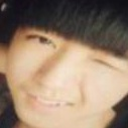

In [30]:
data[6000]

In [31]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 140s 816ms/step - loss: 0.5384 - acc: 0.7567 - val_loss: 0.3350 - val_acc: 0.8645
Epoch 2/5
170/170 [==============================] - 133s 783ms/step - loss: 0.3240 - acc: 0.8804 - val_loss: 0.2972 - val_acc: 0.8744
Epoch 3/5
170/170 [==============================] - 134s 790ms/step - loss: 0.2613 - acc: 0.8998 - val_loss: 0.2605 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 133s 782ms/step - loss: 0.2203 - acc: 0.9115 - val_loss: 0.2554 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 139s 818ms/step - loss: 0.1840 - acc: 0.9285 - val_loss: 0.2365 - val_acc: 0.9041


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 202ms/step - loss: 0.1535 - acc: 0.9365
Test Accuracy = 0.9364659190177917


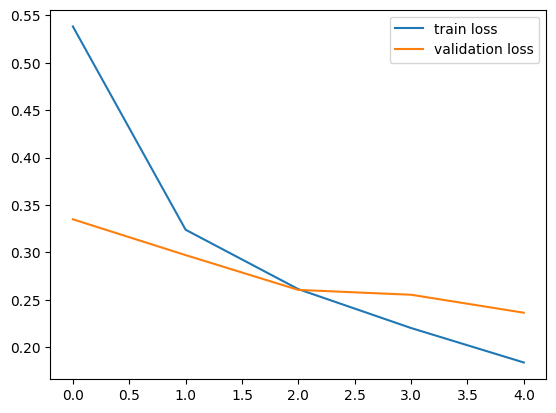

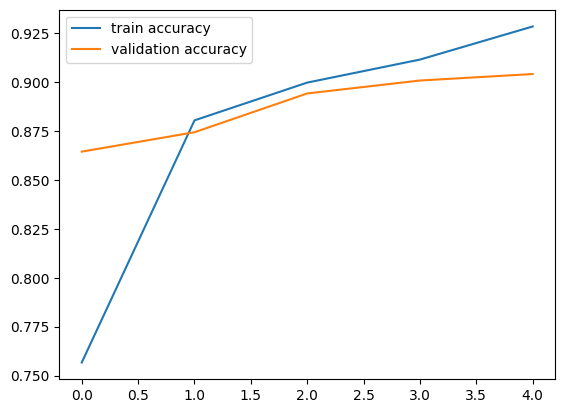

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/no mask2.jpeg


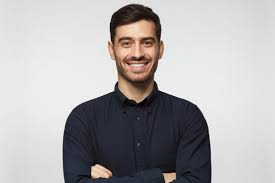

1/1 [==============================] - 0s 29ms/step
[[0.52123255 0.49338835]]
0
The person in the image is not wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/man-wearing-mask---hero---hp-1920-x-1020.jpg.webp


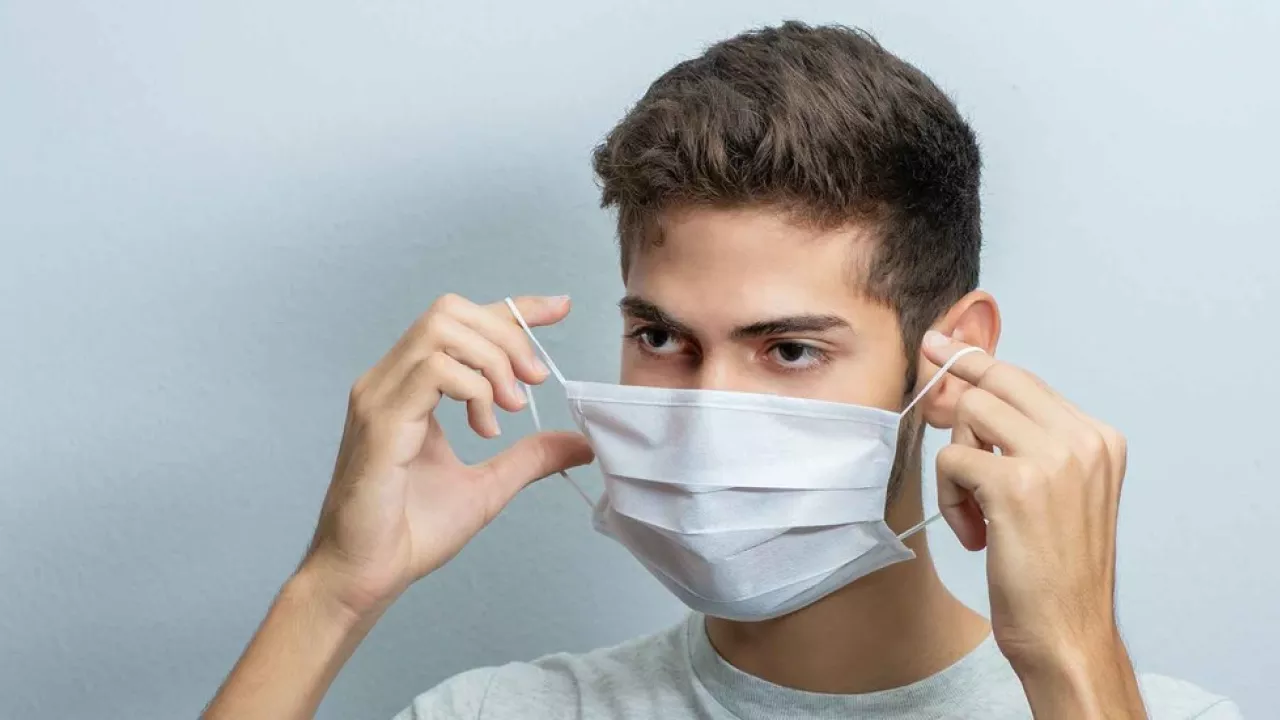

1/1 [==============================] - 0s 50ms/step
[[0.34406063 0.65872335]]
1
The person in the image is wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')